In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

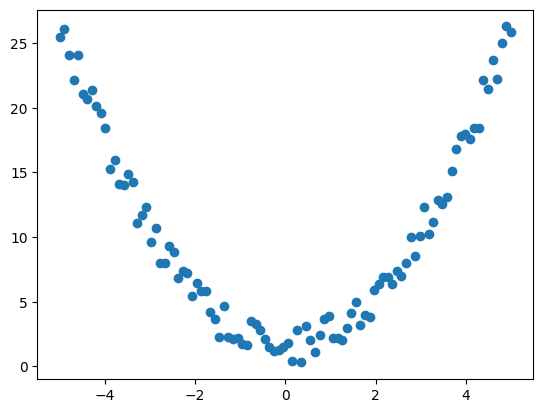

In [2]:
x = torch.unsqueeze (torch.linspace (-5, 5, 100), dim=1)
y = torch.pow (x, 2) + 3 * torch.rand (x.size ())
plt.scatter (x, y)
plt.show ()

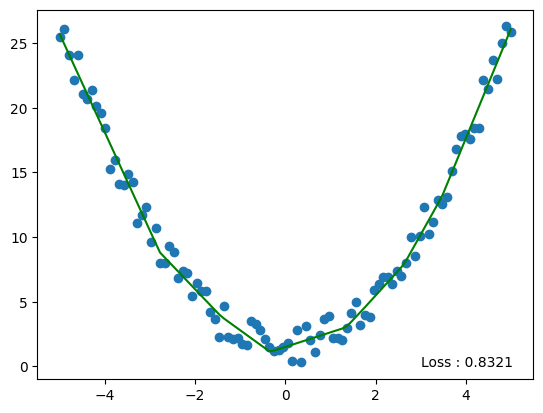

In [7]:
class net (torch.nn.Module) :
    def __init__ (self) -> None:
        super(net, self).__init__()
        self.hidden = torch.nn.Linear (1, 10)
        self.out = torch.nn.Linear (10, 1)
    
    def forward (self, x) : 
        x = torch.nn.functional.relu (self.hidden (x))
        out = self.out (x)
        return out
    
network = net ()

optimizer = torch.optim.SGD (network.parameters (), lr=0.005)
loss_func = torch.nn.MSELoss ()


for epoch in range (5000) :
    pred = network (x)
    loss = loss_func (pred, y)
    optimizer.zero_grad ()
    loss.backward ()
    optimizer.step ()

plt.scatter (x.data.numpy (), y.data.numpy ())
plt.plot (x.data.numpy (), pred.data.numpy (), color="green")
plt.text (3, 0, "Loss : %.4f" % loss.data)
plt.show ()